Streams Library Log-book
=========================

This notebook keeps record of the intermediate computations made to generate some of the stream's footprints stored in the Streams Library

In [1]:
import numpy as np
import scipy
import pylab as plt
import galstreams
import myutils
import bovy_coords as bovyc
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/cmateu/miniconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#Load stream library
streams=galstreams.MWStreams(verbose=False,gcstep=0.05,N=8000)

Alpheus
-------

In [2]:
#Alpheus
dec=np.linspace(-69.,-45.,20)
ra = 32.116-0.00256*dec-0.00225*(dec**2)  #from Grillmair 2013
for raa,deca in zip(ra,dec):
 print '%.1f %+.1f 2. ' % (raa,deca)

21.6 -69.0 2. 
22.0 -67.7 2. 
22.3 -66.5 2. 
22.7 -65.2 2. 
23.1 -63.9 2. 
23.4 -62.7 2. 
23.8 -61.4 2. 
24.1 -60.2 2. 
24.5 -58.9 2. 
24.8 -57.6 2. 
25.1 -56.4 2. 
25.4 -55.1 2. 
25.7 -53.8 2. 
26.0 -52.6 2. 
26.3 -51.3 2. 
26.6 -50.1 2. 
26.9 -48.8 2. 
27.2 -47.5 2. 
27.4 -46.3 2. 
27.7 -45.0 2. 


Hermus
------

In [3]:
#Hermus
dec=np.linspace(5.,+50.,200)
ra=241.571 + 1.37841*dec -0.148870*(dec**2) + 0.00589502*(dec**3) -1.03927E-4*(dec**4) + 7.28133E-7*(dec**5)
 #from Grillmair 2014
for raa,deca in zip(ra,dec):
 print '%.1f %+6.1f 18.5 ' % (raa,deca)

245.4   +5.0 18.5 
245.5   +5.2 18.5 
245.5   +5.5 18.5 
245.6   +5.7 18.5 
245.6   +5.9 18.5 
245.6   +6.1 18.5 
245.7   +6.4 18.5 
245.7   +6.6 18.5 
245.7   +6.8 18.5 
245.7   +7.0 18.5 
245.7   +7.3 18.5 
245.7   +7.5 18.5 
245.7   +7.7 18.5 
245.7   +7.9 18.5 
245.7   +8.2 18.5 
245.7   +8.4 18.5 
245.6   +8.6 18.5 
245.6   +8.8 18.5 
245.6   +9.1 18.5 
245.5   +9.3 18.5 
245.5   +9.5 18.5 
245.4   +9.7 18.5 
245.4  +10.0 18.5 
245.4  +10.2 18.5 
245.3  +10.4 18.5 
245.2  +10.7 18.5 
245.2  +10.9 18.5 
245.1  +11.1 18.5 
245.1  +11.3 18.5 
245.0  +11.6 18.5 
244.9  +11.8 18.5 
244.9  +12.0 18.5 
244.8  +12.2 18.5 
244.8  +12.5 18.5 
244.7  +12.7 18.5 
244.6  +12.9 18.5 
244.5  +13.1 18.5 
244.5  +13.4 18.5 
244.4  +13.6 18.5 
244.3  +13.8 18.5 
244.3  +14.0 18.5 
244.2  +14.3 18.5 
244.1  +14.5 18.5 
244.0  +14.7 18.5 
244.0  +14.9 18.5 
243.9  +15.2 18.5 
243.8  +15.4 18.5 
243.7  +15.6 18.5 
243.7  +15.9 18.5 
243.6  +16.1 18.5 
243.5  +16.3 18.5 
243.4  +16.5 18.5 
243.4  +16.8

Hyllus
------

In [41]:
#Hyllus
dec=np.linspace(11.,+34.,200)
ra=255.8150-0.78364*dec + 0.01532*dec**2
 #from Grillmair 2014
for raa,deca in zip(ra,dec):
 print '%.1f %+.1f 20. ' % (raa,deca)

249.0 +11.0 20. 
249.0 +11.1 20. 
248.9 +11.2 20. 
248.9 +11.3 20. 
248.8 +11.5 20. 
248.8 +11.6 20. 
248.7 +11.7 20. 
248.7 +11.8 20. 
248.6 +11.9 20. 
248.6 +12.0 20. 
248.6 +12.2 20. 
248.5 +12.3 20. 
248.5 +12.4 20. 
248.4 +12.5 20. 
248.4 +12.6 20. 
248.3 +12.7 20. 
248.3 +12.8 20. 
248.2 +13.0 20. 
248.2 +13.1 20. 
248.1 +13.2 20. 
248.1 +13.3 20. 
248.1 +13.4 20. 
248.0 +13.5 20. 
248.0 +13.7 20. 
247.9 +13.8 20. 
247.9 +13.9 20. 
247.8 +14.0 20. 
247.8 +14.1 20. 
247.8 +14.2 20. 
247.7 +14.4 20. 
247.7 +14.5 20. 
247.6 +14.6 20. 
247.6 +14.7 20. 
247.6 +14.8 20. 
247.5 +14.9 20. 
247.5 +15.0 20. 
247.5 +15.2 20. 
247.4 +15.3 20. 
247.4 +15.4 20. 
247.3 +15.5 20. 
247.3 +15.6 20. 
247.3 +15.7 20. 
247.2 +15.9 20. 
247.2 +16.0 20. 
247.2 +16.1 20. 
247.1 +16.2 20. 
247.1 +16.3 20. 
247.1 +16.4 20. 
247.0 +16.5 20. 
247.0 +16.7 20. 
247.0 +16.8 20. 
246.9 +16.9 20. 
246.9 +17.0 20. 
246.9 +17.1 20. 
246.9 +17.2 20. 
246.8 +17.4 20. 
246.8 +17.5 20. 
246.8 +17.6 20. 
246.7 +17.7 20

Orphan
------

This is the southern extension of the Orphan stream, reported by Grillmair+ 2015 (ApJ 812, 1–5)

In [5]:
#Orphan extension, Grillmair
orphan_ext_delta=np.linspace(-18.,-38.,4)
orphan_ext_alpha=163.147-0.0896*orphan_ext_delta+0.00804*(orphan_ext_delta**2)
orph_l,orph_b=bovyc.radec_to_lb(orphan_ext_alpha,orphan_ext_delta,degree=True).T
for la,ba in zip(orph_l,orph_b):
 print '%.1f %+.1f -1. ' % (la,ba)

271.4 +38.5 -1. 
278.1 +33.8 -1. 
284.4 +28.8 -1. 
290.3 +23.4 -1. 


Pal 15 and Eridanus
-------------------

Computed from position angle (PA) and length of the tails from Myeong+ 2017. For each cluster they report the PA and length *l* for the 'tail 1' and 'tail 2', the two tails coming out of the cluster.

In [42]:
#Pal 15
rac,decc=255.01,-0.5419
l1,PA1=59./60.,np.radians(340.)
l2,PA2=29./60.,np.radians(150.)

delta_ra1=l1*np.sin(PA1)/np.cos(np.radians(decc))
delta_dec1=l1*np.cos(PA1)
delta_ra2=l2*np.sin(PA2)/np.cos(np.radians(decc))
delta_dec2=l2*np.cos(PA2)

#print delta_ra1*np.cos(np.radians(decc)),delta_dec1
#print delta_ra2*np.cos(np.radians(decc)),delta_dec2

ra1,dec1=rac -delta_ra1,decc-delta_dec1
ra2,dec2=rac -delta_ra2,decc-delta_dec2

print ra1, dec1
print ra2,dec2

255.346334851 -1.46593107711
254.768322524 -0.123321054838


In [39]:
#Eridanus
rac,decc=66.1854,-21.1869
l1,PA1=18./60.,np.radians(40.)
l2,PA2=11./60.,np.radians(220.)

delta_ra1=l1*np.sin(PA1)/np.cos(np.radians(decc))
delta_dec1=l1*np.cos(PA1)
delta_ra2=l1*np.sin(PA2)/np.cos(np.radians(decc))
delta_dec2=l1*np.cos(PA2)

#print delta_ra1*np.cos(np.radians(decc)),delta_dec1
#print delta_ra2*np.cos(np.radians(decc)),delta_dec2

ra1,dec1=rac -delta_ra1,decc-delta_dec1
ra2,dec2=rac -delta_ra2,decc-delta_dec2

print ra1, dec1
print ra2,dec2

65.9785843122 -21.4167133329
66.3922156878 -20.9570866671


Murrumbidgee
-------------

[   0.93630532  359.19720086] [ 12.54284762  15.24374792]
[ 105.14926078  103.92288714] [-48.67524327 -45.60129203]
[ 133.15351056  131.14483974] [-40.68060698 -38.38978989]


(-90, 20.0)

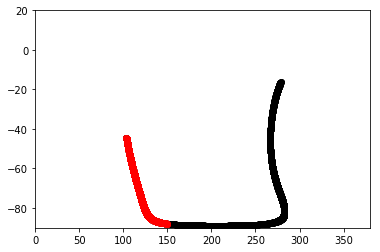

In [10]:
#Murrumbidgee, From Grillmair 2017b
dec=np.linspace(-65,+16.,3000)  
#dec range is not clear in G17's paper, the fiducial point is not included in the mentioned
#range -65<dec<-30.
#print bovyc.lb_to_radec(180.,-5.)
ra=367.893 -0.4647*dec -0.00862*dec**2 + 0.000118*dec**3 +1.2347e-6*dec**4 -1.13758e-7*dec**5
ra=ra % 360.

ll,bb=bovyc.radec_to_lb(ra,dec,degree=True).T
#mask=(-65<bb) & (bb<-30.)
mask=ll<150.

#for raa,deca in zip(ra,dec)[:2]:
# print '%6.1f %+6.1f 20. ' % (raa,deca)  

plt.plot(ll,bb,'ko')
plt.plot(ll[mask],bb[mask],'ro')
ras,decs=ra[mask],dec[mask]
D=20.*np.ones_like(ras)

mur=galstreams.Footprint(ras,decs,'Murr',Rhel=D,cootype='equ')
print mur.ra[::100][-2:],mur.dec[::100][-2:]
print mur.l[::100][-2:],mur.b[::100][-2:]
print mur.phi[::100][-2:],mur.theta[::100][-2:]


mur_l,mur_b=galstreams.gcutils.get_gc_for_pole(160.,+28.)
mur=galstreams.Footprint(mur_l,mur_b,'Murrumbidgee',Rhel=20.+0.*mur_l,degree=True,cootype='gal')
#plt.plot(mur.ra,mur.dec)

ofootn='lib_by_star.murrumbidgee.grillmair2017.dat'
scipy.savetxt(ofootn,np.array([ras,decs,D]).T,header='degrees, kpc\n#RA   DEC  Rhel',fmt='%.2f %+.2f %.1f')



plt.xlim(0.,380.)
plt.ylim(-90,20.)

Molonglo
--------

(-90, 0.0)

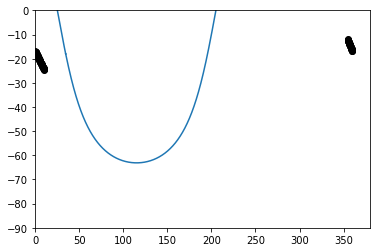

In [7]:
#Molonglo, From Grillmair 2017b
dec=np.linspace(-24.5,-12.,100)
ra=345.017 - 0.5843*dec + 0.0182*dec**2
ra=ra % 360.
dist=20.*np.ones_like(ra)

#for raa,deca in zip(ra,dec):
# print '%.1f %+.1f 20. ' % (raa,deca)   
 
ofootn='lib_by_star.molonglo.grillmair2017.dat'
scipy.savetxt(ofootn,np.array([ra,dec,dist]).T,header='degrees, kpc\n#RA   DEC  Rhel',fmt='%.2f %+.2f %.1f')
    
mur_l,mur_b=galstreams.gcutils.get_gc_for_pole(193.,+22.)
D=20.*np.ones_like(mur_l)
mur=galstreams.Footprint(mur_l,mur_b,'Monlonglo',Rhel=D,degree=True,cootype='gal')    
plt.plot(ra,dec,'ko')   
plt.plot(mur.ra,mur.dec)
plt.xlim(0.,380.)
plt.ylim(-90,0.)

Orinoco
--------

[ 359.  359.] [-25. -25.]
[ 39.52826303  39.52826303] [-77.37641038 -77.37641038]
[ 151.52370473  151.52370473] [-73.35567309 -73.35567309]


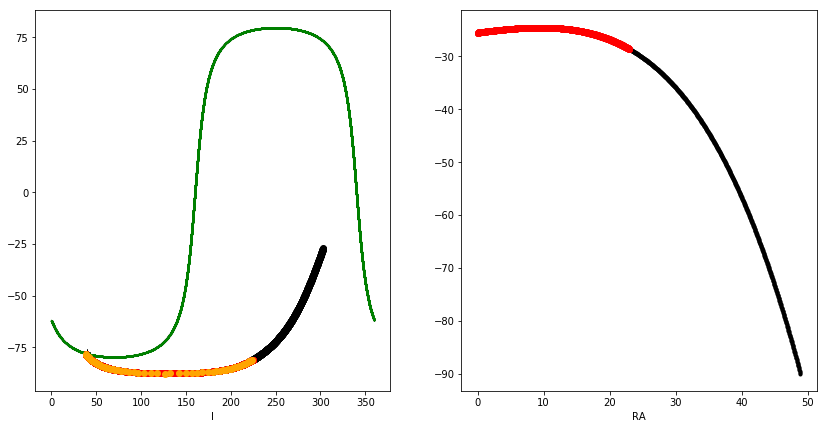

In [22]:
ra = np.linspace(0.,360.,10000)
dec = -25.5146 + 0.1672*ra -0.003827*ra**2 -0.0002835*ra**3 -5.3133e-6*ra**4
ra,dec=ra[np.abs(dec)<=90],dec[np.abs(dec)<=90]
maskb=(ra>(360-36)) | (ra<23) 
ras,decs=ra[maskb],dec[maskb]
dist=20.*np.ones_like(ras)


ll,bb=bovyc.radec_to_lb(ra,dec,degree=True).T

gcl,gcb=galstreams.gcutils.get_gc_for_pole(250.,-10.3)
origc=galstreams.Footprint(gcl,gcb,'gcOri',cootype='gal',degree=True)

fid_ra,fid_dec=np.array([ 359.,359.]) ,np.array([ -25.,-25.]) 
orifid=galstreams.Footprint(fid_ra,fid_dec,'fidOri',Rhel=20.+0.*fid_ra,cootype='equ',degree=True)
print orifid.ra,orifid.dec
print orifid.l,orifid.b
print orifid.phi,orifid.theta

plt.figure(1,figsize=(14,7))
plt.subplot(121)
plt.plot(ll,bb,'ko')
plt.plot(ll[maskb],bb[ maskb],'ro')
plt.plot(origc.l,origc.b,'g.',ms=1)
plt.plot(orifid.l,orifid.b,'k+')
plt.xlabel('l')

plt.plot(streams['Orinoco'].l,streams['Orinoco'].b,'o',color='orange')

plt.subplot(122)
plt.plot(ra,dec,'k.')
#plt.plot(ras0,decc0,'bo')
plt.plot(ras,decs,'ro')

plt.xlabel('RA')

#Overwrite Orinoco's footprint
ofootn='lib_by_star.orinoco.grillmair2017.dat'
scipy.savetxt(ofootn,np.array([ras,decs,dist]).T,header='degrees, kpc\n#RA   DEC  Rhel',fmt='%.2f %+.2f %.1f')
#for raa,deca in zip(ras,decc):
# print '%.1f %+.1f 20. ' % (raa,deca)   


Kwando
-------

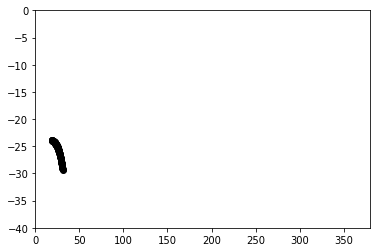

In [5]:
ras = np.linspace(19.,31.,100)
decs = -7.817 -2.354*ras +0.1202*ras**2 -0.00215*ras**3 
dist=20*np.ones_like(ras)

#st_l,st_b=galstreams.gcutils.get_gc_for_pole(237.,+13.)
#st=galstreams.Footprint(st_l,st_b,'Kwando',degree=True,cootype='gal')    
plt.plot(ras,decs,'ko')   
#plt.plot(st.ra,st.dec)
plt.xlim(0.,380.)
plt.ylim(-40.,0.)

#for raa,deca in zip(ras,decs):
# print '%.1f %+.1f 20. ' % (raa,deca)   

ofootn='lib_by_star.kwando.grillmair2017.dat'
scipy.savetxt(ofootn,np.array([ras,decs,dist]).T,header='degrees, kpc\n#RA   DEC  Rhel',fmt='%.2f %+.2f %.1f')



# Jet Stream (Jethwa et al. 2017, arxive, not accepted jet)

133.756858247 -27.7023455296
141.998255824 -17.8150504219


Text(138.05,-22.8076,u'Jet')

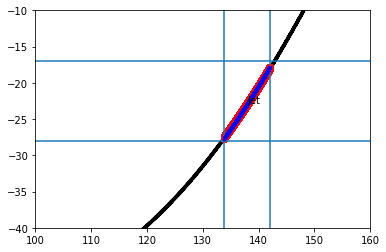

In [8]:
#props
dist=28.6 #kpc
width=0.18
#RA-DEC pole
gcra_all,gcdec_all=galstreams.gcutils.get_gc_for_pole(64.983, 34.747,degree=True,dlat=width)

plt.plot(gcra_all,gcdec_all,'k.',ms=1)

#Limit to reported RA and DEC ranges
ramin,ramax=15.*(8.+55./60.),15*(9.+28./60.)
decmin,decmax=-28.,-17.
#print ramin, ramax, decmin, decmax

jetmask=(gcra_all>=ramin) & (gcra_all<=ramax) & (gcdec_all>=decmin) & (gcdec_all<=decmax)
gcra_jet,gcdec_jet=gcra_all[jetmask],gcdec_all[jetmask]

plt.plot(gcra_jet,gcdec_jet,'ro')

plt.axvline(ramin)
plt.axvline(ramax)
plt.axhline(decmin)
plt.axhline(decmax)

plt.ylim(-40,-10)
plt.xlim(100,160)

#Print only end-points so this can be defined by lib_by_pair
print gcra_jet[0],gcdec_jet[0]
print gcra_jet[-1],gcdec_jet[-1]

#Double checking
plt.plot(streams['Jet'].ra,streams['Jet'].dec,'bo',ms=2.)
plt.text(streams['Jet'].cra,streams['Jet'].cdec,'Jet',horizontalalignment='left')
#for raa,deca in zip(gcra_jet,gcdec_jet)[]:
# print '%.2f %.2f %.1f ' % (raa,deca,dist)   

# DES STREAMS (to be accepted)

Indus 14.0
Jhelum 11.0
Ravi 20.0
Chenab 35.0
Elqui 50.0
Aliqa_Uma 31.0
Turbio 18.0
Willka_Yaku 34.0
Turranburra 33.0
Wambelong 20.0
Palca 38.0


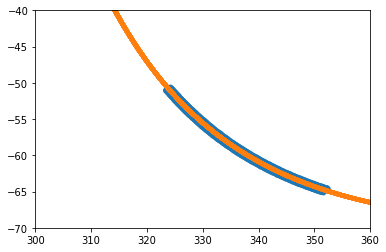

In [3]:
plt.plot(streams['Indus'].ra,streams['Indus'].dec,'.')
gcra,gcdec=galstreams.gcutils.get_gc_for_pole(24.8,21.6,degree=True)
plt.plot(gcra,gcdec,'.')
plt.xlim(300,360)
plt.ylim(-70,-40)

for des in ['Indus','Jhelum','Ravi','Chenab','Elqui','Aliqa_Uma','Turbio','Willka_Yaku','Turranburra'
            ,'Wambelong','Palca']:
   print des,streams[des].Rgal.mean().round()


ASCII Footprints
=========================

In [5]:
#Load stream library
streams=galstreams.MWStreams(verbose=False,gcstep=0.05,N=8000)
#Downsize Sgr footprint
print streams['Sgr-L10'].ra.size,
mask=np.arange(streams['Sgr-L10'].ra.size)[::5]
streams['Sgr-L10'].mask_footprint(mask)
print streams['Sgr-L10'].ra.size,

100000 20000


In [6]:
#-------------Save footprints in individual files-------------------------
head='#%9s %10s %10s %10s %10s %10s %10s %10s\n' % ('RA_deg','DEC_deg','l_deg','b_deg','Rhel_kpc',
                                                'phi_deg','theta_deg','Rgal_kpc')
for skey in streams.keys():
    #if '/' in skey: skey.replace('/','-')
    ofilen='../../footprints/individual_footprints/galstreams.footprint.%s.dat' % (skey.replace('/','-'))
    print 'Saving footprint for stream',skey,'in',ofilen

    ofile=open(ofilen,'w')
    ofile.write(head)

    Rgal=streams[skey].Rgal
    phi=streams[skey].phi
    theta=streams[skey].theta
    if Rgal is None: Rgal=phi=theta=-1*np.ones_like(streams[skey].l)
    scipy.savetxt(ofile,np.array([streams[skey].ra,streams[skey].dec,
                                   streams[skey].l,streams[skey].b,
                                   streams[skey].Rhel,
                                   phi,theta,Rgal]).T,
                                   fmt='%10.4f %10.4f %10.4f %10.4f %10.3f %10.4f %10.4f %10.3f')
    ofile.close()

Saving footprint for stream Her-Aq in ../../footprints/individual_footprints/galstreams.footprint.Her-Aq.dat
Saving footprint for stream PS1-A in ../../footprints/individual_footprints/galstreams.footprint.PS1-A.dat
Saving footprint for stream Elqui in ../../footprints/individual_footprints/galstreams.footprint.Elqui.dat
Saving footprint for stream Jet in ../../footprints/individual_footprints/galstreams.footprint.Jet.dat
Saving footprint for stream Lethe in ../../footprints/individual_footprints/galstreams.footprint.Lethe.dat
Saving footprint for stream Acheron in ../../footprints/individual_footprints/galstreams.footprint.Acheron.dat
Saving footprint for stream Kwando in ../../footprints/individual_footprints/galstreams.footprint.Kwando.dat
Saving footprint for stream Hermus in ../../footprints/individual_footprints/galstreams.footprint.Hermus.dat
Saving footprint for stream Turbio in ../../footprints/individual_footprints/galstreams.footprint.Turbio.dat
Saving footprint for stream A

In [7]:
#-------------Save footprints in a single file-------------------------
head='#%9s %10s %10s %10s %10s %10s %10s %10s %4s %6s %-12s\n' % ('RA_deg','DEC_deg','l_deg','b_deg','Rhel_kpc',
                                                'phi_deg','theta_deg','Rgal_kpc',
                                                'NSt','IDst','StreamName')

ofilen='../../footprints/galstreams.footprint.ALL.dat'
ofile=open(ofilen,'w')
ofile.write(head)

olfilen='../../footprints/galstreams.footprint.ALL.reflabels.dat'
olfile=open(olfilen,'w')
olfile.write(head)

snum=0
for skey in streams.keys():
    
    sname=skey
    if '-' in skey: sname=sname.replace('-','')
    if '/' in skey: sname=sname.replace('/','')
    shortname=streams[skey].sname     
    print 'Saving footprint for stream %s as %s (%s)' % (skey,sname,shortname)

    Rgal=streams[skey].Rgal
    phi=streams[skey].phi
    theta=streams[skey].theta
    snum=snum+1 #unique numerical streamID
    
    if Rgal is None: Rgal=phi=theta=-1*np.ones_like(streams[skey].l)
        
    #fullnames=['Tri/Pis','VOD/VSS','Sgr-L10','NGC5466','PS1-A','PS1-B','PS1-C','PS1-D','PS1-E',
    #           'Pal15','Pal5','PAndAS','ATLAS']    
    #if skey not in fullnames: shortname=sname[:3]    
    #else: shortname=sname
        
    for i in range(streams[skey].ra.size): 
        ofile.write('%10.4f %10.4f %10.4f %10.4f %10.3f %10.4f %10.4f %10.3f %4s %6s %-12s\n' %
                    (streams[skey].ra[i],streams[skey].dec[i],streams[skey].l[i],streams[skey].b[i],
                     streams[skey].Rhel[i],phi[i],theta[i],Rgal[i],snum,shortname,sname))
    
    #one line per stream, to store stream ref point for label    
    olfile.write('%10.4f %10.4f %10.4f %10.4f %10.3f %10.4f %10.4f %10.3f %4s %6s %-12s\n' %
                    (streams[skey].cra,streams[skey].cdec,streams[skey].cl,streams[skey].cb,
                     np.mean(streams[skey].Rhel),phi[0],theta[0],Rgal[0],snum,shortname,sname))
        
        
ofile.close()
olfile.close()


Saving footprint for stream Her-Aq as HerAq (HerAq)
Saving footprint for stream PS1-A as PS1A (PS1-A)
Saving footprint for stream Elqui as Elqui (Elq)
Saving footprint for stream Jet as Jet (Jet)
Saving footprint for stream Lethe as Lethe (Let)
Saving footprint for stream Acheron as Acheron (Ach)
Saving footprint for stream Kwando as Kwando (Kwa)
Saving footprint for stream Hermus as Hermus (Her)
Saving footprint for stream Turbio as Turbio (Tur)
Saving footprint for stream ACS as ACS (ACS)
Saving footprint for stream Hyllus as Hyllus (Hyl)
Saving footprint for stream ATLAS as ATLAS (ATLAS)
Saving footprint for stream Tri/Pis as TriPis (TriPis)
Saving footprint for stream Murrumbidgee as Murrumbidgee (Mur)
Saving footprint for stream Chenab as Chenab (Che)
Saving footprint for stream Palca as Palca (Palca)
Saving footprint for stream NGC5466 as NGC5466 (NGC5466)
Saving footprint for stream Eridanus as Eridanus (Eri)
Saving footprint for stream Phoenix as Phoenix (Phe)
Saving footprint 

# GitHub Quick Guide Example

Text(0,0.5,u'$b$ (deg)')

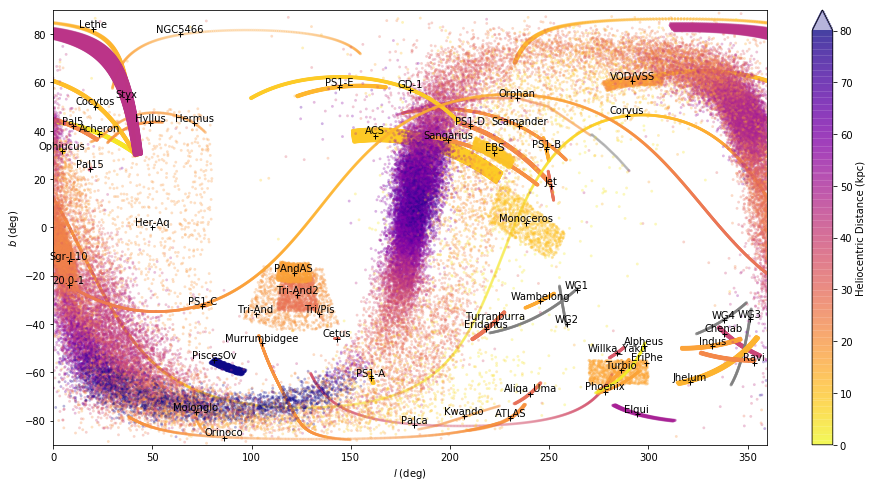

In [3]:
mwsts=galstreams.MWStreams(verbose=False)

fig=plt.figure(1,figsize=(16,8))
ax=fig.add_subplot(111)
cmapp=plt.cm.plasma_r
cmapp.set_under('grey')
mwsts.plot_stream_compilation(ax,plot_colorbar=True,scat_kwargs=dict(vmin=0.,vmax=80.,cmap=cmapp, alpha=0.3),
                              use_shortnames=False, cb_kwargs=dict(label='Heliocentric Distance (kpc)'), 
                              cootype='gal',verbose=False)
ax.set_xlim(0.,360.)
ax.set_ylim(-90.,90.)
ax.set_xlabel('$l$ (deg)')
ax.set_ylabel('$b$ (deg)')

#plt.savefig('../../examples/quickex.png')


Skipping excluded stream: Sgr-L10
Skipping excluded stream: Sgr-L10
Skipping stream WG4, no valid Rhel => no valid galactocentric attributes
Skipping stream WG1, no valid Rhel => no valid galactocentric attributes
Skipping stream WG3, no valid Rhel => no valid galactocentric attributes
Skipping stream WG2, no valid Rhel => no valid galactocentric attributes


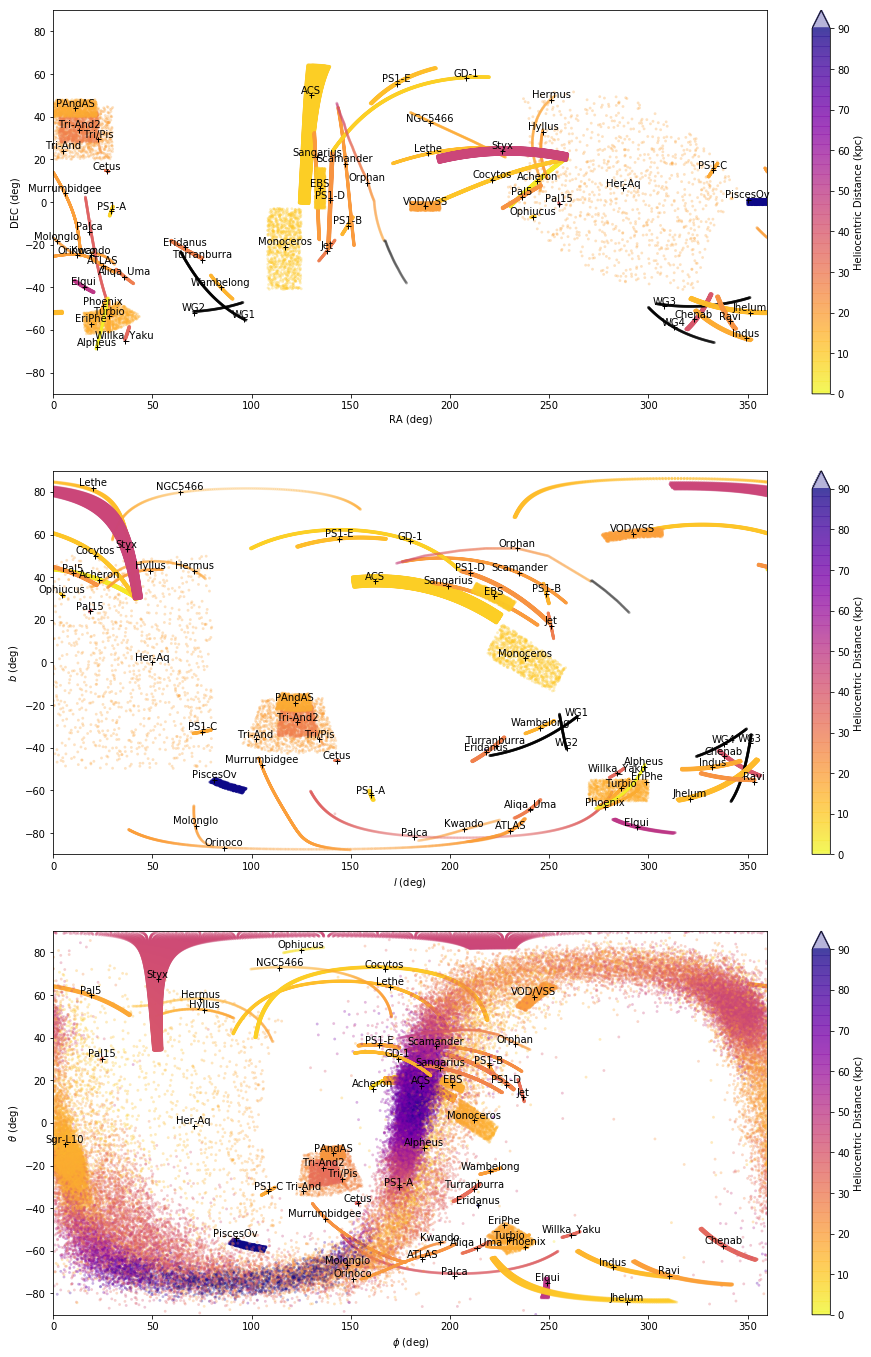

In [7]:
mwsts=galstreams.MWStreams(verbose=False)

fig=plt.figure(1,figsize=(16,24))
cmapp=plt.cm.plasma_r
cmapp.set_under('k')
cmapp.set_bad('r')
ax=fig.add_subplot(311)
mwsts.plot_stream_compilation(ax,plot_colorbar=True,scat_kwargs=dict(vmin=0.,vmax=90.,cmap=cmapp, alpha=0.3),
                              cb_kwargs=dict(label='Heliocentric Distance (kpc)'), exclude_streams=['Sgr-L10'],
                              cootype='equ',verbose=False)
ax.set_xlim(0.,360.)
ax.set_ylim(-90.,90.)
ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)');

ax=fig.add_subplot(312)
mwsts.plot_stream_compilation(ax,plot_colorbar=True,scat_kwargs=dict(vmin=0.,vmax=90.,cmap=cmapp, alpha=0.3),
                              cb_kwargs=dict(label='Heliocentric Distance (kpc)'), exclude_streams=['Sgr-L10'],
                              cootype='gal',verbose=False)
ax.set_xlim(0.,360.)
ax.set_ylim(-90.,90.)
ax.set_xlabel('$l$ (deg)')
ax.set_ylabel('$b$ (deg)');

ax=fig.add_subplot(313)
mwsts.plot_stream_compilation(ax,plot_colorbar=True,scat_kwargs=dict(vmin=0.,vmax=90.,cmap=cmapp, alpha=0.3),
                              cb_kwargs=dict(label='Heliocentric Distance (kpc)'), exclude_streams=[],
                              cootype='GC',verbose=False)
ax.set_xlim(0.,360.)
ax.set_ylim(-90.,90.)
ax.set_xlabel('$\phi$ (deg)')
ax.set_ylabel('$\\theta$ (deg)');